In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train_1D = x_train.reshape(len(x_train), 784)
x_train_1D = x_train_1D/255
x_test_1D = x_test.reshape(len(x_test), 784)
x_test_1D = x_test_1D/255

In [4]:
model =keras.Sequential( [ keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') ] )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train_1D, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9284
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2547 - accuracy: 0.9294
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2524 - accuracy: 0.9302
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9312
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9315
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2473 - accuracy: 0.9317
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9317
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2445 - accuracy: 0.9325
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2438 - accuracy: 0.9328
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.242

Not bad. Now let's try implementing rectified linear unit (RELU) activation function to see if we can get higher accuracy

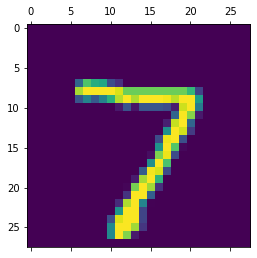

In [12]:
y_pred = model.predict(x_test_1D)
plt.matshow(x_test[0])

In [14]:
np.argmax(y_pred[0])

7

In [15]:
y_pred_labels = [np.argmax(y_pred[i]) for i in range(10000)]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    1,    8,    7,    3,    1,    0],
       [   0, 1111,    4,    2,    0,    1,    4,    2,   11,    0],
       [   4,    8,  932,   18,    7,    5,   11,   10,   34,    3],
       [   3,    0,   12,  930,    1,   28,    2,   10,   19,    5],
       [   1,    1,    6,    3,  917,    0,    9,    6,   10,   29],
       [   7,    2,    1,   35,    8,  785,   15,    6,   30,    3],
       [  12,    3,    5,    3,    7,   14,  911,    1,    2,    0],
       [   1,    7,   19,   11,    5,    2,    0,  956,    2,   25],
       [   6,    7,    5,   25,    7,   24,    8,   10,  876,    6],
       [   8,    7,    1,   13,   23,    7,    0,   26,    9,  915]],
      dtype=int32)>

Let's make the confusion matrix look prettier using a heatmap

In [16]:
import seaborn as sns

Text(69.0, 0.5, 'Predicted')

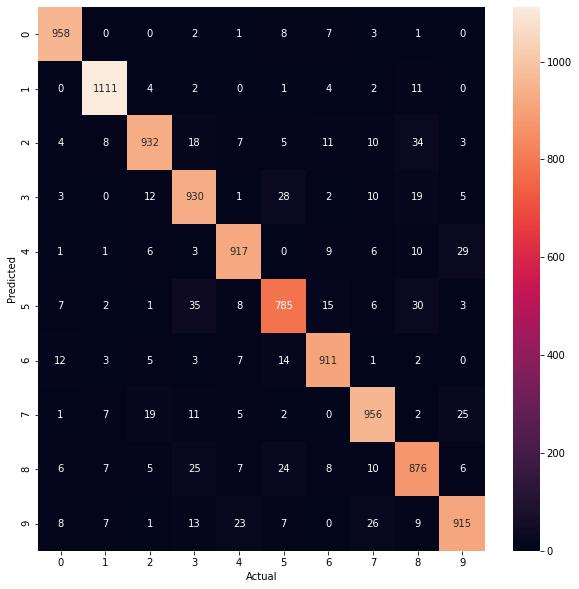

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [22]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train_1D, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 20.2924 - accuracy: 0.1652
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 20.2774 - accuracy: 0.1567
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 20.2774 - accuracy: 0.1422
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 20.2774 - accuracy: 0.1310
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 20.2774 - accuracy: 0.1218


Looks like mean-square-error loss function yields very low accuracy. let's try using a different loss function

In [23]:
model2 = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')])


model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train_1D, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2714 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1218 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0506 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0266 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018